# Download historical price data for S&P500 ETF from yahoo finance
> YahooファイナンスからS&P500連動型ETFの株価データ(日足のヒストリカルデータ)をダウンロードしてチャートを表示する

- toc: true
- branch: master
- badges: true
- comments: false
- categories: [pandas, historical stock price, data visualization]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

githubにダウンローダーを公開しているので、それをgit cloneする。

In [3]:
!git clone https://github.com/yuki-data/yahoo_finance_jp.git

Cloning into 'yahoo_finance_jp'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 2), reused 12 (delta 2), pack-reused 0
Unpacking objects: 100% (12/12), done.


git cloneしてきたスクリプトを実行する

In [4]:
run yahoo_finance_jp/yahoo_downloader.py

S&P500連動型ETFの銘柄コード(1557)とデータの取得期間を指定して、ダウンロードする

In [6]:
downloader = YahooJpStockHistorical(symbol_code=1557, start="2020-01-01", end="2020-06-16", pause_single_table=3, request_session=requests.Session())
df = downloader.get_stockdata()

このように、株価のデータを表形式で取得できた。

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj_Close
108,2020-01-06,34800,34850,34700,34750,7632,34750
107,2020-01-07,35050,35200,35050,35200,3487,35200
106,2020-01-08,34550,34900,34200,34850,11349,34850
105,2020-01-09,35450,35600,35450,35600,6255,35600
104,2020-01-10,35850,35900,35800,35900,3461,35900


matplotlibによるプロットでチャートを作成

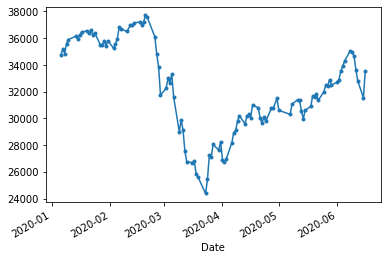

In [12]:
df.set_index("Date").Close.plot(style=".-")